In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
print("shape of X_train:",X_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of X_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)


In [4]:
X=X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

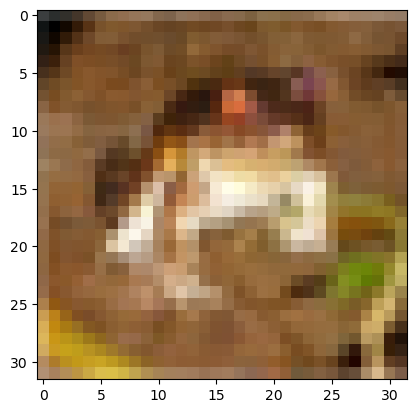

In [7]:
plt.imshow(X_train[0])

In [8]:
print("Shape of X_train after normalization:", X_train.shape)
print("Shape of y_train after one-hot encoding:", y_train.shape)

Shape of X_train after normalization: (50000, 32, 32, 3)
Shape of y_train after one-hot encoding: (50000, 10)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 186ms/step - accuracy: 0.2319 - loss: 2.0581 - val_accuracy: 0.4805 - val_loss: 1.4153
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.4576 - loss: 1.4833 - val_accuracy: 0.5716 - val_loss: 1.1837
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.5520 - loss: 1.2549 - val_accuracy: 0.6221 - val_loss: 1.0561
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.6058 - loss: 1.1147 - val_accuracy: 0.6682 - val_loss: 0.9369
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.6407 - loss: 1.0268 - val_accuracy: 0.7087 - val_loss: 0.8381
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 280ms/step - accuracy: 0.6723 - loss: 0.9425 - val_accuracy: 0.7169 - val_loss: 0.8040
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.6936 - loss: 0.8743 - val_accuracy: 0.7243 - val_loss: 0.7905
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 302ms/step - accuracy: 0.7136 -

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8070 - loss: 0.6244
Test accuracy: 0.8031


In [15]:
model.save('cifar10_cnn_model.h5')
print("Model saved as 'cifar10_cnn_model.h5'")

Model saved as 'cifar10_cnn_model.h5'


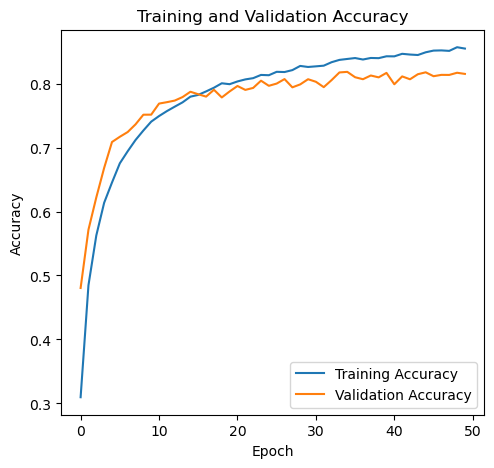

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

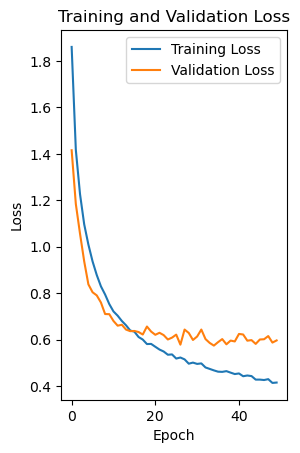

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


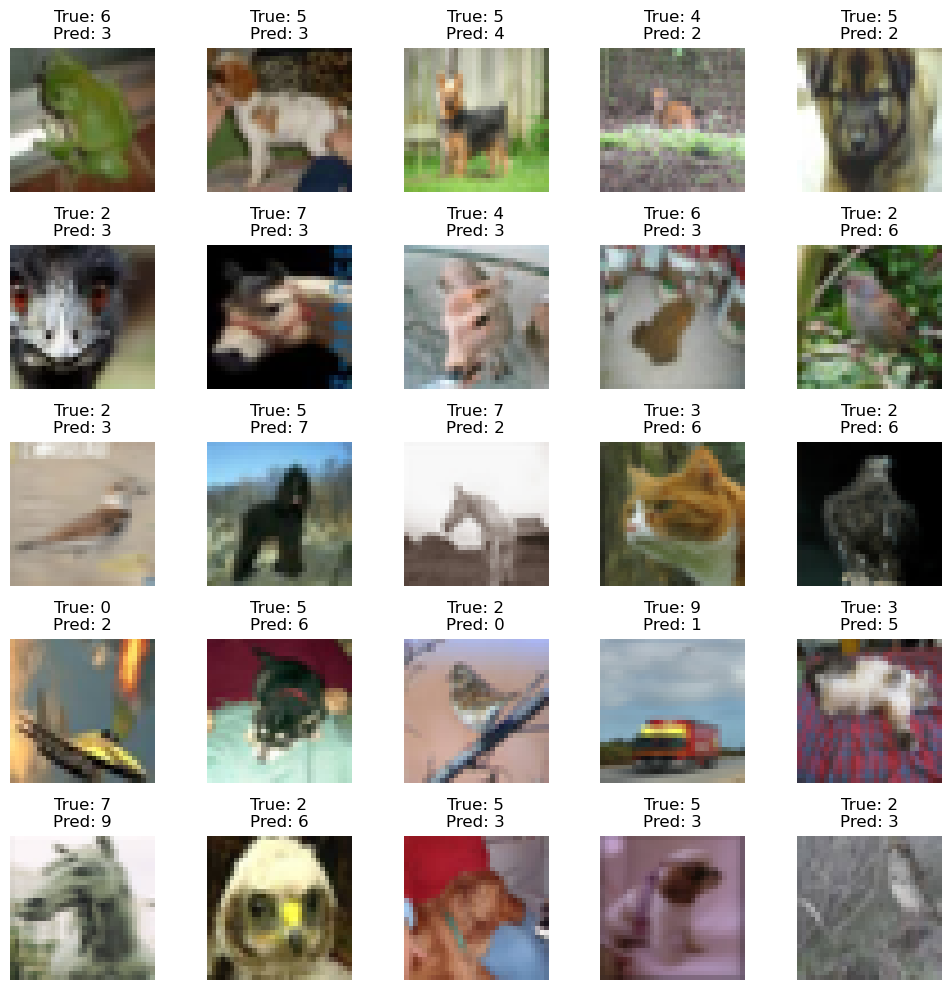

In [21]:
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[index])
    plt.title(f'True: {y_true_classes[index]}\nPred: {y_pred_classes[index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import build_cnn_model

def main():

    (X_train, y_train), (X_test, y_test) = cifar10.load_data() 
    

    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    

    model = build_cnn_model()
    history = train_model(model, X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    test_loss, test_acc = evaluate_model(model, X_test, y_test)
    
    save_model(model, filename='cifar10_cnn_model.h5')
    plot_training_history(history)
    visualize_misclassified_images(model, X_test, y_test)

if __name__ == "__main__":
    main()

ImportError: cannot import name 'build_cnn_model' from 'tensorflow.keras.models' (C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\_tf_keras\keras\models\__init__.py)